<a href="https://colab.research.google.com/github/junwei719/PDS202207/blob/main/Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Part 0 — Install + Import
!pip install nltk wordcloud matplotlib pandas sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import string
import re

nltk.download('vader_lexicon')

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Part 1 — Load Dataset

df = pd.read_excel("/content/Final Overall Opinion Dataset.xlsx")
df.head(5)

,RespondentID,Age,Gender,Occupation,EducationLevel,EwalletUsageFrequency,OverallOpinion,IssuesEncountered,UsefulOrProblematicFeatures,ImprovementSuggestion,RecommendAndWhy,SubmissionTimestamp
0,1,56,Female,Employed (Private),Bachelor's,Daily,The app is very convenient for daily payment. ...,"Saw many cases people kena scam reload, scary....",Hope next time offline QR can work even if no ...,Maybe TNG can work with local influencers or Y...,"I will recommend it for daily use, but hope th...",2025-09-19 10:00:00
1,2,20,Female,Unemployed,Bachelor's,Daily,"Very smooth transaction, fast QR scanning. Qui...",No PayLater option so less flexible than Shope...,"Point system very leceh, cannot redeem proper ...",Can invite some Malaysian KOL or TikTokers to ...,NaN,2025-09-14 15:00:00
2,3,32,Female,Employed (Public),Diploma,Several times/week,The app is very convenient for daily payment.,PayLater feature missing compared to competito...,"Reward very little, not attractive anymore. Wh...",Should ask some lifestyle influencer to promot...,"I will recommend it for daily use, but hope th...",2025-10-15 21:00:00
3,4,60,Female,Employed (Public),Diploma,Daily,The app is very convenient for daily payment. ...,Sometimes the line super bad until cannot load...,Wish they add PayLater like other e-wallets. U...,Can invite some Malaysian KOL or TikTokers to ...,"I will recommend it for daily use, but hope th...",2025-10-02 16:00:00
4,5,25,Male,Employed (Public),Diploma,Daily,"Fast and reliable most of the time, no big iss...",OTP sometimes lag until cannot verify. Point s...,If they add offline payment sure very useful. ...,Maybe TNG can work with local influencers or Y...,"I can recommend it, but the app still needs im...",2025-10-23 14:00:00


In [6]:
# Part 2 — Text Cleaning Function

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+","",text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub("\s+"," ",text)
    remove_words = ["tng","touch","ngo","ewallet","e-wallet"]
    for w in remove_words:
        text = text.replace(w, "")
    return text.strip()

df["clean_overall"] = df["OverallOpinion"].apply(clean_text)

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2345375922.py:9: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s+"," ",text)


In [7]:
# Part 3 — Apply VADER Sentiment

sia = SentimentIntensityAnalyzer()
df["compound"] = df["clean_overall"].apply(lambda x: sia.polarity_scores(x)["compound"])

def label_sentiment(c):
    if c > 0:
        return "positive"
    elif c < 0:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df["compound"].apply(label_sentiment)

df["sentiment"].value_counts()

,count
sentiment,
positive,106
negative,28
neutral,16


In [8]:
# Part 4 — Split into Positive & Negative Text

positive_texts = df[df["sentiment"]=="positive"]["clean_overall"]
negative_texts = df[df["sentiment"]=="negative"]["clean_overall"]

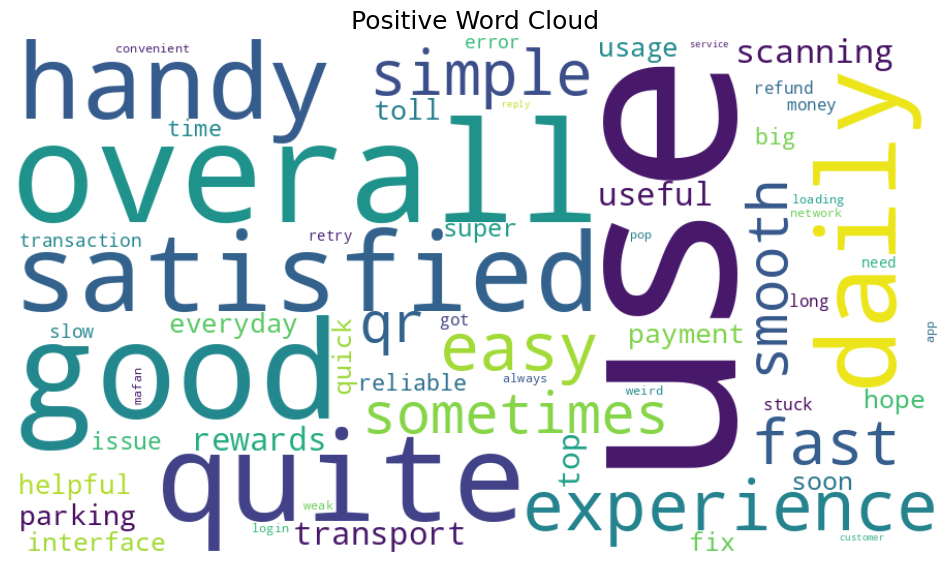

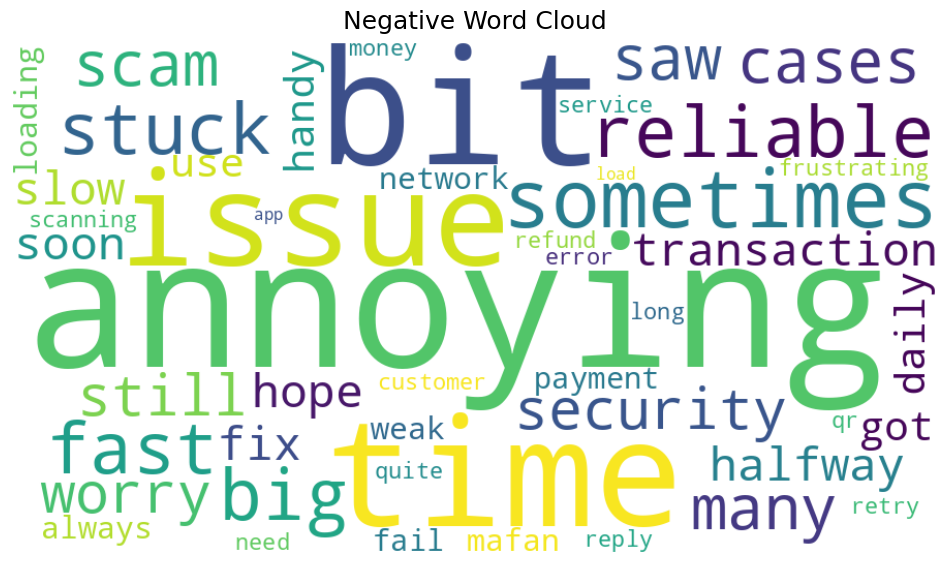

In [9]:
# Part 5 — Word Cloud Function (Q1:Positive and Negative opinions)

def create_wordcloud(text_series, title):
    text = " ".join(text_series)
    wc = WordCloud(
        width=900,
        height=500,
        background_color="white",
        colormap="viridis",
        collocations=False
    ).generate(text)

    plt.figure(figsize=(12,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title, fontsize=18)
    plt.axis("off")
    plt.show()

# WordCloud 1: Positive
create_wordcloud(positive_texts, "Positive Word Cloud")

# WordCloud 2: Negative
create_wordcloud(negative_texts, "Negative Word Cloud")

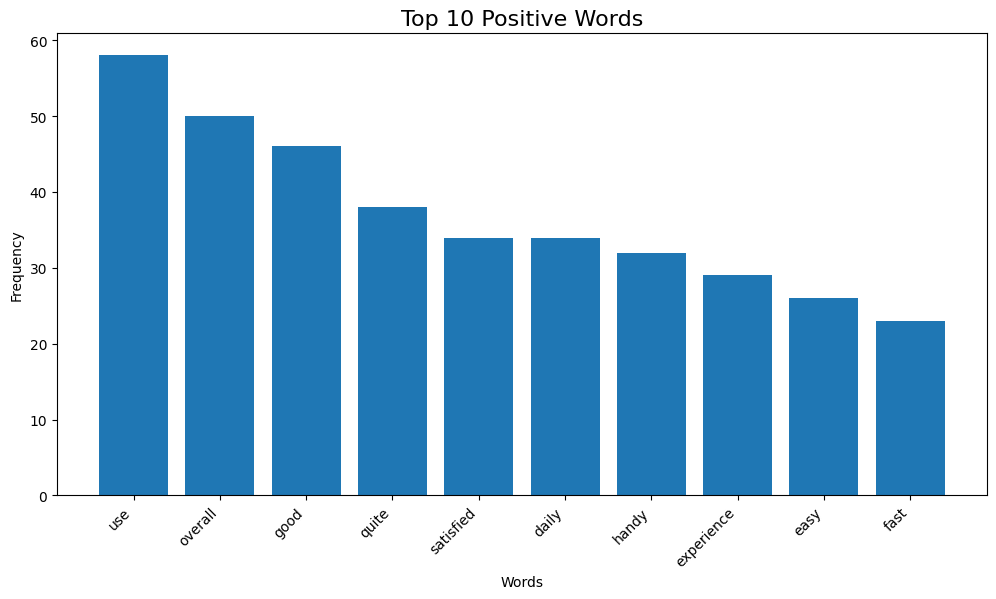

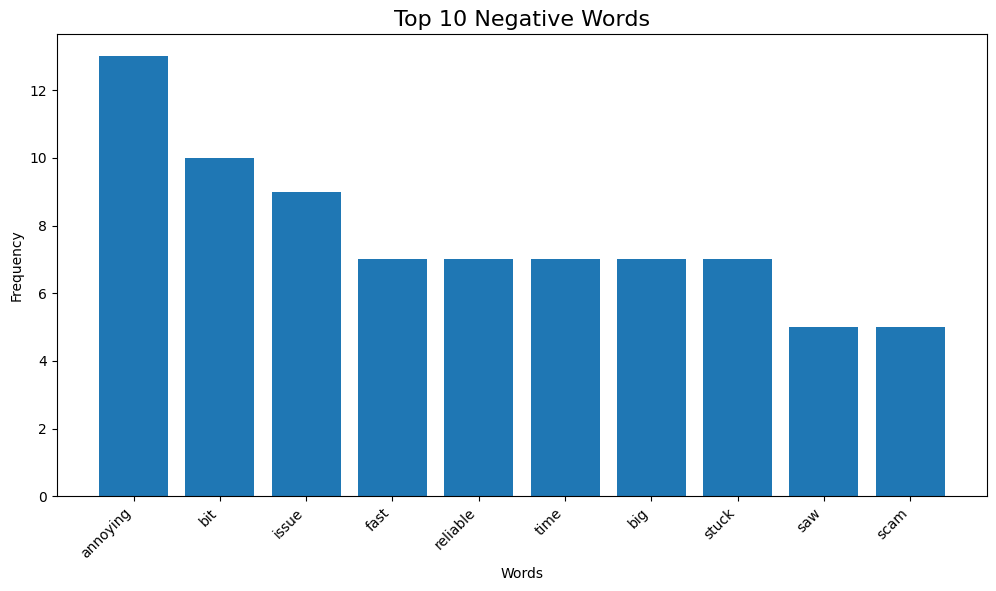

In [10]:
# Part 6 — Top Words-Bar Chart (Q1:Positive and Negative words)

def plot_top_words(text_series, title, color):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_series)
    sum_words = X.sum(axis=0)

    word_freq = [
        (word, sum_words[0, idx])
        for word, idx in vectorizer.vocabulary_.items()
    ]

    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]

    words = [w[0] for w in word_freq]
    counts = [w[1] for w in word_freq]

    plt.figure(figsize=(12,6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha="right")
    plt.title(title, fontsize=16)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()


# Bar Chart 1: Positive
plot_top_words(positive_texts, "Top 10 Positive Words", "green")

# Bar Chart 2: Negative
plot_top_words(negative_texts, "Top 10 Negative Words", "red")

In [11]:
# Part 8 — Question 2: Issues / Features (Find Negative Sentences)

# Make table content fully visible
pd.set_option('display.max_colwidth', None)

# 1. combine two variable into one
df["q2_raw"] = (
    df["IssuesEncountered"].fillna("").astype(str) + " " +
    df["UsefulOrProblematicFeatures"].fillna("").astype(str)
).str.strip()

# 2. clean text
df["q2_clean"] = df["q2_raw"].apply(clean_text)

# 3. use VADER calculate sentiment score
df["q2_compound"] = df["q2_clean"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

# 4. use same label_sentiment to distribute positive / negative / neutral
df["q2_sentiment"] = df["q2_compound"].apply(label_sentiment)

# see Q2 overall sentiment distribution
print("Q2 Sentiment distribution (%):")
print(df["q2_sentiment"].value_counts(normalize=True) * 100)

# 5. only select negative's sentences
q2_negative = df[df["q2_sentiment"] == "negative"].copy()

# Visualization
q2_negative_display = q2_negative[["q2_raw", "q2_compound"]].rename(
    columns={
        "q2_raw": "IssueComment",
        "q2_compound": "VADER_Compound_Score"
    }
)

# display the first 5 results
print("\nNegative Opinion for Q2:")
q2_negative_display.head(5)

Q2 Sentiment distribution (%):
q2_sentiment
negative    59.333333
positive    40.666667
Name: proportion, dtype: float64

Negative Opinion for Q2:


,IssueComment,VADER_Compound_Score
0,"Saw many cases people kena scam reload, scary. Points basically useless, only can use for lucky draw. Previous promo better, now cashback very low. Shopee got PayLater but TNG still don't have, abit outdated. Offline mode missing, many place cannot use TNG. Just my experience lah. Hope next time offline QR can work even if no data. UI too complicated especially for older people. Weird login error make me scared kena hack. Shopee got PayLater but TNG still don't have, abit outdated. Cashback macam tipu one, hard to earn. Not hate, just feedback only.",-0.9100
1,"No PayLater option so less flexible than Shopee. Reward very little, not attractive anymore. OTP sometimes lag until cannot verify. Not hate, just feedback only. Point system very leceh, cannot redeem proper reward. Really need an offline payment option, now without line totally cannot pay. No PayLater option so less flexible than Shopee. Sometimes the line super bad until cannot load the QR. Weird login error make me scared kena hack. A bit annoying sometimes.",-0.8068
2,"PayLater feature missing compared to competitors. Collect points for what? Can't use anywhere. UI too complicated especially for older people. When internet weak I straight cannot pay, very mafan. Just my experience lah. Reward very little, not attractive anymore. When internet weak I straight cannot pay, very mafan. Points so hard to use, no good redemption. Offline mode missing, many place cannot use TNG. No PayLater option so less flexible than Shopee. Not hate, just feedback only.",-0.3574
4,"OTP sometimes lag until cannot verify. Point system very leceh, cannot redeem proper reward. Previous promo better, now cashback very low. When internet weak I straight cannot pay, very mafan. Hard to find features, layout too confusing. Hope they improve soon. If they add offline payment sure very useful. Sometimes the line super bad until cannot load the QR. Reward very little, not attractive anymore. PayLater feature missing compared to competitors. Not hate, just feedback only.",-0.1460
5,"When internet weak I straight cannot pay, very mafan. UI too complicated especially for older people. Saw many cases people kena scam reload, scary. Offline mode missing, many place cannot use TNG. Hope they improve soon. Offline mode missing, many place cannot use TNG. Collect points for what? Can't use anywhere. Reward very little, not attractive anymore. App keep loading forever when many people using. A bit annoying sometimes.",-0.9618


In [12]:
# Part 9 — Q3: Improvement Suggestions (Answer RQ3)

# Make table content fully visible
pd.set_option('display.max_colwidth', None)

# 1. CLEAN TEXT from ImprovementSuggestion column
df["q3_clean"] = df["ImprovementSuggestion"].fillna("").astype(str).apply(clean_text)

# 2. APPLY VADER
df["q3_compound"] = df["q3_clean"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["q3_sentiment"] = df["q3_compound"].apply(label_sentiment)

print("Q3 Sentiment Distribution (%):")
print(df["q3_sentiment"].value_counts(normalize=True) * 100)

# Representative Sentences Table (for report)
# Key step: Use rename to change column names for the final display
q3_table = df[["ImprovementSuggestion", "q3_compound", "q3_sentiment"]].rename(
    columns={
        "q3_compound": "VADER_Compound_Score",
        "q3_sentiment": "Sentiment"
    }
)

# Sort using the new column name "VADER_Compound_Score"
q3_table = q3_table.sort_values("VADER_Compound_Score", ascending=False)

print("\nRepresentative Improvement Suggestions (Top 5):")
q3_table.head(5)

Q3 Sentiment Distribution (%):
q3_sentiment
positive    100.0
Name: proportion, dtype: float64

Representative Improvement Suggestions (Top 5):


,ImprovementSuggestion,VADER_Compound_Score,Sentiment
85,"Maybe TNG can work with local influencers or YouTubers to explain the features in a fun way, I really hope next time can pay even when there is no data, like some kind of offline wallet. Please make the security stronger, maybe add pop-up alert when device change or unusual transaction. Would be nice to have more collaboration with government, like toll rebate or public transport discount. More on-ground promotion at universities and offices will help older users and newbies. Hope TNG team can consider, not hate, just feedback only.",0.9783,positive
39,"Can invite some Malaysian KOL or TikTokers to share how they use the app, also would be great if offline QR payment can work even with weak internet. Please make the security stronger, maybe add pop-up alert when device change or unusual transaction. Maybe organise more offline campaign at campus or pasar malam to promote e-wallet. Hope they continue things like eBelia type campaign and give more incentive for using cashless. Hope TNG team can consider, not hate, just feedback only.",0.9781,positive
116,"Should ask some lifestyle influencer to promote the useful functions, I really hope next time can pay even when there is no data, like some kind of offline wallet. They can set up booth in shopping mall to help users activate and learn all the features. Maybe increase cashback or point redemption options, now feel a bit stingy haha. Hope they continue things like eBelia type campaign and give more incentive for using cashless. Hope TNG team can consider, not hate, just feedback only.",0.9773,positive
5,"Should ask some lifestyle influencer to promote the useful functions, also would be great if offline QR payment can work even with weak internet. Hope they continue things like eBelia type campaign and give more incentive for using cashless. Please make the security stronger, maybe add pop-up alert when device change or unusual transaction. Thx if they can really listen to user comment.",0.9732,positive
140,"Should ask some lifestyle influencer to promote the useful functions, also would be great if offline QR payment can work even with weak internet. Security can also improve, like better scam warning and clearer notification for suspicious login. Hope they continue things like eBelia type campaign and give more incentive for using cashless. More on-ground promotion at universities and offices will help older users and newbies. Hope TNG team can consider, not hate, just feedback only.",0.9722,positive
